In [1]:
# Now we will analyse the effect of the variable "Offer" on the "Total Sale Amount" and the "Number of Products Sold".

# Check the project workspace and set paths for folders.

import os
print("Project Workspace:", os.getcwd())
path = r'G:\Customer Analytics in Large Organisations\Assignment 1\2014'
print()

# Import all necessary packages for the project.

import pandas as pd
import glob as glob
import warnings
warnings.filterwarnings("ignore")
import statistics as myStats
from math import floor
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
from statsmodels.stats.multicomp import MultiComparison

# Revome scientific notation to expand numbers in the dataset up to the second decimal place.

pd.set_option("display.float_format", lambda x: "%.4f" % x)
pd.set_option("display.max_rows", 1000000000)
pd.set_option("display.max_columns", 1000000000)

Project Workspace: C:\Users\ASUS\Codes



In [2]:
# From the "Sale Date" data, we get the day, month and date columns for each transaction.

def fetchMonthAndYearColumns(dataFile):
    dataFile["Day"] = dataFile["Sale_Date"].apply(lambda month: month.split("-")[2])
    dataFile["Month"] = dataFile["Sale_Date"].apply(lambda month: month.split("-")[1])
    dataFile["Year"] = dataFile["Sale_Date"].apply(lambda year: year.split("-")[0])
    dataFile.drop(columns = ["Sale_Date"])
    return dataFile


# Import data for each day and collate the data. For this, we create a function "importAndCollate()" for year 2014.

def importAndCollate():
    dataFileList = []
    fileNames = [fileName for fileName in glob.glob(path + "/*.csv", recursive = True)]
    for fileName in fileNames:
        dataFileList.append(pd.read_csv(fileName))
    year2014DataFile = pd.concat(dataFileList, ignore_index = False)
    print("Size of Dataset:", year2014DataFile.shape)
    return year2014DataFile

In [3]:
# Import all data for a year and collate it in one dataframe.

year2014DataFile = importAndCollate()

Size of Dataset: (12560113, 14)


In [4]:
# Delete uneccessary coloumns

del year2014DataFile['Sale_Time']
del year2014DataFile['Receipt_Line_No']
del year2014DataFile['Total_Receipt_Lines']
del year2014DataFile['Barcode_Item']

In [5]:
# Remove "NA" from "UniSA_Customer_No" and delete unnessary columns and values into a new data frame yearDataFile for 
# the year 2014 file.

year2014DataFile = year2014DataFile.dropna(subset=['UniSA_Customer_No', 'Commodity_Name'])
year2014DataFile['UniSA_Customer_No'] = ['%.12g' % n for n in year2014DataFile['UniSA_Customer_No']]
yearDataFile = pd.DataFrame(data=year2014DataFile)
#yearDataFile

In [6]:
index1 = yearDataFile.index
number_of_rows1 = len(index1)
number_of_rows1

12033430

In [7]:
# Transform the "Sale Date" column into three different columns, one each for "Sale Day", "Sale Month" and "Sale Year"

yearDataFile = fetchMonthAndYearColumns(yearDataFile)
#yearDataFile.shape()

In [8]:
# Drop super customers found in part 1

yearDataFile = yearDataFile[yearDataFile.UniSA_Customer_No != 9333734328]
yearDataFile = yearDataFile[yearDataFile.UniSA_Customer_No != 693320906]
yearDataFile = yearDataFile[yearDataFile.UniSA_Customer_No != 9721472842]
yearDataFile = yearDataFile[yearDataFile.UniSA_Customer_No != 1408064326]

index2 = yearDataFile.index
number_of_rows2 = len(index2)
number_of_rows2

12033430

In [9]:
# Let's explore the data for the month of January (Month == "01").

januaryData = yearDataFile[yearDataFile["Month"] == "01"]
januaryDataOffer = januaryData[["Day", "Month", "Year", "UniSA_Receipt_No1", "UniSA_Customer_No", "Item_Description", "Commodity_Name", "Quantity_Sold", "Item_Value", "Offer"]][januaryData["Offer"] == "YES"]
januaryOfferProducts = januaryDataOffer["Item_Description"].unique().tolist()
januaryDataNoOffer = januaryData[["Day", "Month", "Year", "UniSA_Receipt_No1", "UniSA_Customer_No", "Item_Description", "Commodity_Name", "Quantity_Sold", "Item_Value", "Offer"]][(januaryData["Offer"] == "NO") & (januaryData["Item_Description"].isin(januaryOfferProducts))]

In [10]:
# Check all the different "Commodity Names" available in January.

januaryDataOffer["Commodity_Name"].unique().tolist()

['MICELLANEOUS',
 'SALAD DRESSINGS, MAYONNAISE',
 'VEGETABLES',
 'JUICE',
 'BUTTER',
 'POULTRY AND BIRD FOODS',
 'ICE CREAMS AND ICE CONFECTIONS',
 'MISCELLANEOUS CLEANING GOODS',
 'NATURES',
 'PUMPKIN',
 'CANNED VEGETABLES',
 'SAUCES - ALL VARIETIES',
 'COOKING NEEDS',
 'JAMS AND HONEYS',
 'HEALTH FOODS',
 'AERATED WATERS',
 'PASTA-SAUCES & GARLIC BREAD',
 'FRUIT',
 'FRUIT JUICES, PASTEURISED',
 'VINEGAR',
 'PAPER TISSUES AND TOWELS',
 'PASTA AND TOMATO PASTE',
 'CAT FOOD - DRY AND MOIST',
 'OTHER PERISHABLES',
 'DRIED FRUIT AND NUTS',
 'FROZEN VEGETABLES',
 'YUMMY',
 'BISCUITS',
 'FROZEN MEALS AND PIZZAS',
 'HOT PACKS, READY MEALS',
 'DISINFECTANTS',
 'MILK , MILK DRINKS AND CUSTARD',
 'MARGARINE AND OILS',
 'SPICES, MUSTARD, HERBS',
 'LAUNDRY AIDS AND LIQUIDS',
 'BREAKFAST FOODS',
 'SEAFOOD BAR',
 'ASIAN SECTION(DIRECT)',
 'CHOCOLATE CONFECTIONERY',
 'CHUTNEY, PICKLES, CONDIMENTS',
 'BEEF',
 'CHIPS AND SNACKS',
 'DOG FOOD CANNED',
 'FLOUR',
 'BREAD',
 'CORDIALS, CORDIAL EXTRACTS',
 

In [11]:
# Look for any item under any commodity name

januaryDataOffer["Item_Description"][januaryDataOffer["Commodity_Name"] == "HEALTH FOODS"].value_counts()

P/CHOICE PEPITAS 500G             54
MELROSE OMEGA FISH OIL 500ML      53
P/CHOICE S/FLOWER SEEDS 500G      50
P/CHOICE CHIA SEEDS BLACK  250    45
GO NAT MACADAMIA DREAM 50G        45
A/OWN RICE MILK ORG UHT     1L    41
GO NATURAL NUT DELIGHT 40G        39
GO NAT YOG ALM&APRICOT40G         36
G/NESS FIB BAR APP/SULT 6PK 21    30
CHIATAH WHITE POUCH 150G          29
GO NAT ALMOND&CASHEW45G           28
CHIA SEED 1KG                     27
S/BRITE SLC APRICOT 90G           26
MELROSE ORG C/NUT OIL R/F 300G    25
CHIATAH BLACK POUCH 150G          25
ORGRAN CRISPBREAD CORN 125GM      24
P/CHOICE GOJI BERRIES 250G        24
MELROSE ORG C/NUT BTR UN/RF 30    23
BE NATURAL NUT DELIGHT 50G        23
GLDN/DAY APR DELIGHT    150GM     22
GO NAT ALMOND&APRICOT40G          21
G/NESS FIB BAR CRN/NUT 6PK 210    20
P/CHOICE LSA 250G                 20
P/CHOICE SESAME SEEDS 250G        19
ORGRAN GF ITSY COCOA O'S 300G     19
GO NAT YOG FRT&NUT G/F 35G        19
CHIA SEED  500G                   18
O

,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales_Volume,Sales_Volume_Difference
0,07,01,2014,1.9900,NO,0.0000,1.0000,1,0.0000
1,10,01,2014,1.9900,NO,0.0000,2.0000,1,1.0000
2,11,01,2014,1.9900,NO,0.0000,1.0000,1,0.0000
3,13,01,2014,1.9900,NO,0.0000,1.0000,1,0.0000
4,17,01,2014,1.9900,NO,0.0000,1.0000,1,0.0000
5,21,01,2014,1.9900,NO,0.0000,1.0000,1,0.0000
6,25,01,2014,1.9900,NO,0.0000,1.0000,1,0.0000


,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales_Volume,Sales_Volume_Difference
0,07,01,2014,1.9900,NO,0.0000,1.0000,1,0.0000
1,10,01,2014,1.9900,NO,0.0000,2.0000,1,1.0000
2,11,01,2014,1.9900,NO,0.0000,1.0000,1,0.0000
3,13,01,2014,1.9900,NO,0.0000,1.0000,1,0.0000
4,17,01,2014,1.9900,NO,0.0000,1.0000,1,0.0000
5,21,01,2014,1.9900,NO,0.0000,1.0000,1,0.0000
6,25,01,2014,1.9900,NO,0.0000,1.0000,1,0.0000
7,02,01,2014,1.2900,YES,35.1759,16.0000,1,15.0000
8,03,01,2014,1.2900,YES,35.1759,13.0000,1,12.0000
9,04,01,2014,1.2900,YES,35.1759,9.0000,1,8.0000



      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1       group2       meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
   0.0 35.175879396984925   9.1648 0.0023 3.5444 14.7853   True
---------------------------------------------------------------



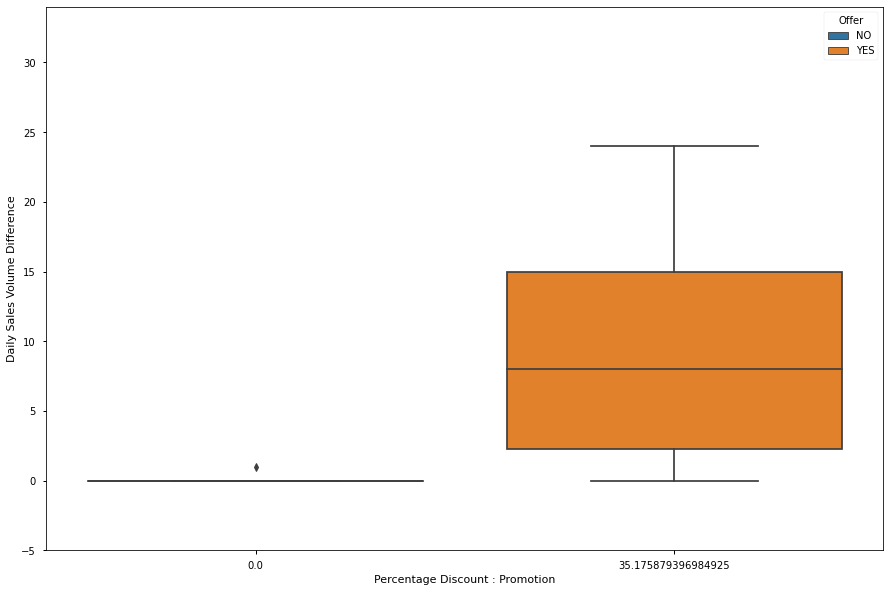

In [12]:
# Let's now consider one product from both datasets for January, and look at how offers affected purchases.

januaryDataNoOfferProd = januaryDataNoOffer[januaryDataNoOffer["Item_Description"] == "PEKISH SOUR CRM&CHIVES 100G"]
januaryDataNoOfferProd["Item_Value"] = (januaryDataNoOfferProd["Item_Value"] / januaryDataNoOfferProd["Quantity_Sold"]).round(2)
maxPrice = januaryDataNoOfferProd["Item_Value"].max()
januaryDataNoOfferProd["Percentage_Discount"] = (maxPrice - januaryDataNoOfferProd["Item_Value"] ) * 100 / maxPrice
januaryDataNoOfferProd = januaryDataNoOfferProd.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
januaryDataNoOfferProd["Expected_Sales_Volume"] = floor(myStats.median(januaryDataNoOfferProd["Quantity_Sold"][januaryDataNoOfferProd["Percentage_Discount"] == 0.0]))
januaryDataNoOfferProd["Sales_Volume_Difference"] = januaryDataNoOfferProd["Quantity_Sold"] - januaryDataNoOfferProd["Expected_Sales_Volume"]
display(januaryDataNoOfferProd)
print() 

januaryDataOfferProd = januaryDataOffer[januaryDataOffer["Item_Description"] == "PEKISH SOUR CRM&CHIVES 100G"]
januaryDataOfferProd["Item_Value"] = (januaryDataOfferProd["Item_Value"] / januaryDataOfferProd["Quantity_Sold"]).round(2)
januaryDataOfferProd["Percentage_Discount"] = (maxPrice - januaryDataOfferProd["Item_Value"]) * 100 / maxPrice
januaryDataOfferProd = januaryDataOfferProd.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
januaryDataOfferProd["Expected_Sales_Volume"] = floor(myStats.median(januaryDataNoOfferProd["Quantity_Sold"][januaryDataNoOfferProd["Percentage_Discount"] == 0.0]))
januaryDataOfferProd["Sales_Volume_Difference"] = januaryDataOfferProd["Quantity_Sold"]- januaryDataOfferProd["Expected_Sales_Volume"]

januaryDataOfferProd= pd.concat([januaryDataNoOfferProd[januaryDataNoOfferProd["Percentage_Discount"] == 0.0], januaryDataOfferProd], axis = 0, ignore_index = True)
display(januaryDataOfferProd)
print()

plt.figure(figsize = (15, 10))
boxPlotDiscPercSalesVolOffer = sb.boxplot(x = "Percentage_Discount", y = "Sales_Volume_Difference", data = januaryDataOfferProd, hue = "Offer", dodge = False)
boxPlotDiscPercSalesVolOffer.set(xlabel = "Percentage Discount : Promotion", ylabel = "Daily Sales Volume Difference")
boxPlotDiscPercSalesVolOffer.set_ylim(min(januaryDataOfferProd["Sales_Volume_Difference"]) - 5, max(januaryDataOfferProd["Sales_Volume_Difference"]) + 10)

#mc1 = MultiComparison(januaryDataNoOfferProd['Sales_Difference'], januaryDataNoOfferProd['Percentage_Discount'])
#mc_results1 = mc1.tukeyhsd(alpha = 0.05)
#print(mc_results1)
#print()

mc2 = MultiComparison(januaryDataOfferProd['Sales_Volume_Difference'], januaryDataOfferProd['Percentage_Discount'])
mc_results2 = mc2.tukeyhsd(alpha = 0.05)
#mc2.groupsunique
print(mc_results2)
print()

In [14]:
#januaryDataOfferProd.describe()

In [15]:
#januaryDataNoOfferProd.describe()

In [16]:
# Let's explore the data for the month of August (Month == "08").

augustData = yearDataFile[yearDataFile["Month"] == "08"]
augustDataOffer = augustData[["Day", "Month", "Year", "UniSA_Receipt_No1", "UniSA_Customer_No", "Item_Description", "Commodity_Name", "Quantity_Sold", "Item_Value", "Offer"]][augustData["Offer"] == "YES"]
augustOfferProducts = augustDataOffer["Item_Description"].unique().tolist()
augustDataNoOffer = augustData[["Day", "Month", "Year", "UniSA_Receipt_No1", "UniSA_Customer_No", "Item_Description", "Commodity_Name", "Quantity_Sold", "Item_Value", "Offer"]][(augustData["Offer"] == "NO") & (augustData["Item_Description"].isin(augustOfferProducts))]

In [17]:
# Check all the different "Commodity Names" available in January.

augustDataOffer["Commodity_Name"].unique().tolist()

['SAUCES - ALL VARIETIES',
 'CHIPS AND SNACKS',
 'OTHER CONFECTIONERY',
 'CORDIALS, CORDIAL EXTRACTS',
 'MICELLANEOUS',
 'PASTA AND TOMATO PASTE',
 'FRUIT JUICES, PASTEURISED',
 'MARGARINE AND OILS',
 'MISCELLANEOUS MEAT',
 'BISCUITS',
 'POTATOES',
 'CANNED SOUPS',
 'PAPER TISSUES AND TOWELS',
 'CANNED FISH',
 'BUTTER',
 'FOILS & WRAPPINGS',
 'STATIONERY',
 'FROZEN VEGETABLES',
 'SMALLGOODS',
 'DESSERTS AND PUDDINGS',
 'CHRISTMAS LINES',
 'CANNED VEGETABLES',
 'COOKING NEEDS',
 'OILS - COOKING AND SALAD',
 'COFFEE - INSTANT AND PURE',
 'DISHWASHING PRODUCTS',
 'CHEESE',
 'PORK',
 'ONIONS',
 'TEA AND TEA BAGS',
 'CHEESES - LOCAL AND IMPORTED',
 'FLOUR',
 'SALAD DRESSINGS, MAYONNAISE',
 'MILK , MILK DRINKS AND CUSTARD',
 'EGGS',
 'PACKET SOUPS AND STOCKCUBES',
 'FISH',
 'FRUIT',
 'CHUTNEY, PICKLES, CONDIMENTS',
 'HOT PACKS, READY MEALS',
 'FRUIT JUICES',
 'OTHER PERISHABLES',
 'MENORA/MANASSEN/TOP TASTE',
 'JAMS AND HONEYS',
 'CHOCOLATE CONFECTIONERY',
 'CAKE MIXES',
 'YUMMY',
 'TOILETRI

In [18]:
# Look for any item under any commodity name

augustDataOffer["Item_Description"][augustDataOffer["Commodity_Name"] == "FROZEN VEGETABLES"].value_counts()

L/FARM PEAS              500GM    650
B/EYE CHIPS GLDN CRNCH     1KG    253
B/EYE CRINKLE GLDN CRNCH   1KG    250
B/EYE POT/WDGE GLDN CRNCH  1KG    223
L/FARM CORN KERNELS JUICY500GM    137
B/EYE C/HRV PEA/CORN     500GM     99
B/EYE C/HARV GARDEN MIX    1KG     99
MCC PEAS BABY PREMIUM    500GM     79
L/FARM PEAS MINTED       500GM     74
$ MCC CAULIFLOWER          500     73
$ MCC BROCCOLI             500     73
B/EYE C/HARV SPRNG GRN MIX 1KG     70
B/EYE CAR BN CORN BROC    1KG      70
MCC PEAS                   1KG     70
MCC CORN KERNELS         500GM     62
B/EYE CAR CAU BN BROX   500GM      62
MCC BEANS WHOLE          500GM     60
$ MCC CORN KERNELS S/JUCY  500     58
$ B/EYE S/FRSH CRRT/BRC&CRN450     57
MCC BEANS SLCD           500GM     57
MCC PEAS BABY PREMIUM      1KG     56
MCC FRIES B/BAT THN/CRSP 750GM     55
$ B/EYE S/FRSH BRC/CAUL&CRT450     54
B/EYE C/HRV PEA/CORN/CAPS500GM     48
HNZ PEAS BABY            500GM     48
B/EYE C/HRV CAR/CAUL/BROC500GM     46
MCC BEANS SL

In [19]:
# Let's now consider another product from both datasets for , and look at how offers affected purchases.

augustDataNoOfferProd = augustDataNoOffer[augustDataNoOffer["Item_Description"] == "B/EYE CRINKLE GLDN CRNCH   1KG"]
augustDataNoOfferProd["Item_Value"] = (augustDataNoOfferProd["Item_Value"] / augustDataNoOfferProd["Quantity_Sold"]).round(2)
maxPrice = augustDataNoOfferProd["Item_Value"].max()
augustDataNoOfferProd["Percentage_Discount"] = (maxPrice - augustDataNoOfferProd["Item_Value"] ) * 100 / maxPrice
augustDataNoOfferProd = augustDataNoOfferProd.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
augustDataNoOfferProd["Expected_Sales_Volume"] = floor(myStats.median(augustDataNoOfferProd["Quantity_Sold"][augustDataNoOfferProd["Percentage_Discount"] == 0.0]))
augustDataNoOfferProd["Sales_Volume_Difference"] = augustDataNoOfferProd["Quantity_Sold"] - augustDataNoOfferProd["Expected_Sales_Volume"]
display(augustDataNoOfferProd)
print()

augustDataOfferProd = augustDataOffer[augustDataOffer["Item_Description"] == "B/EYE CRINKLE GLDN CRNCH   1KG"]
augustDataOfferProd["Item_Value"] = (augustDataOfferProd["Item_Value"] / augustDataOfferProd["Quantity_Sold"]).round(2)
augustDataOfferProd["Percentage_Discount"] = (maxPrice - augustDataOfferProd["Item_Value"]) * 100 / maxPrice
augustDataOfferProd = augustDataOfferProd.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
augustDataOfferProd["Expected_Sales_Volume"] = floor(myStats.median(augustDataNoOfferProd["Quantity_Sold"][augustDataNoOfferProd["Percentage_Discount"] == 0.0]))
augustDataOfferProd["Sales_Volume_Difference"] = augustDataOfferProd["Quantity_Sold"]- augustDataOfferProd["Expected_Sales_Volume"]
display(augustDataOfferProd)
print()


,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales_Volume,Sales_Volume_Difference
0,01,08,2014,4.4700,NO,10.7784,4.0000,1,3.0000
1,02,08,2014,4.4700,NO,10.7784,1.0000,1,0.0000
2,03,08,2014,4.4700,NO,10.7784,1.0000,1,0.0000
3,04,08,2014,4.4700,NO,10.7784,2.0000,1,1.0000
4,04,08,2014,5.0100,NO,0.0000,5.0000,1,4.0000
5,06,08,2014,4.4700,NO,10.7784,2.0000,1,1.0000
6,07,08,2014,4.4700,NO,10.7784,1.0000,1,0.0000
7,07,08,2014,5.0100,NO,0.0000,1.0000,1,0.0000
8,08,08,2014,4.4700,NO,10.7784,3.0000,1,2.0000
9,09,08,2014,4.4700,NO,10.7784,2.0000,1,1.0000


,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales_Volume,Sales_Volume_Difference
0,13,08,2014,3.2900,YES,34.3313,4.0000,1,3.0000
1,14,08,2014,3.2900,YES,34.3313,23.0000,1,22.0000
2,15,08,2014,3.2900,YES,34.3313,2.0000,1,1.0000
3,16,08,2014,3.2900,YES,34.3313,13.0000,1,12.0000
4,17,08,2014,3.2900,YES,34.3313,6.0000,1,5.0000
5,18,08,2014,3.2900,YES,34.3313,11.0000,1,10.0000
6,19,08,2014,3.2900,YES,34.3313,6.0000,1,5.0000
7,20,08,2014,3.2900,YES,34.3313,8.0000,1,7.0000
8,21,08,2014,3.2900,YES,34.3313,22.0000,1,21.0000
9,22,08,2014,2.8900,YES,42.3154,74.0000,1,73.0000


In [20]:
#augustDataNoOfferProd.describe()

In [21]:
# In case of augustDataNoOfferProd dataset -
# There are no promotions with such discounts. It could be a product close to expiration. Or something else "unusual". 
# Obviously, this price should not be included in the "base" price. Easy solution is to select the 75% quantile ~ 4.4700
# But if we check the base item value is 5.0100 based on the percentage discounts.
# And Quantity sold where "Item_Value" is not equal to 5.0100 will be set as abs value of 75% Quantile "Item_Value" is equal to 5.0100.

#First Calculate all

augustDataNoOfferProd = augustDataNoOffer[augustDataNoOffer["Item_Description"] == "B/EYE CRINKLE GLDN CRNCH   1KG"]
maxPrice = augustDataNoOfferProd["Item_Value"].max()
augustDataNoOfferProd["Percentage_Discount"] = (maxPrice - augustDataNoOfferProd["Item_Value"] ) * 100 / maxPrice
augustDataNoOfferProd = augustDataNoOfferProd.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
augustDataNoOfferProd["Expected_Sales_Volume"] = floor(myStats.median(augustDataNoOfferProd["Quantity_Sold"][augustDataNoOfferProd["Percentage_Discount"] == 0.0]))
augustDataNoOfferProd["Sales_Volume_Difference"] = augustDataNoOfferProd["Quantity_Sold"] - augustDataNoOfferProd["Expected_Sales_Volume"]

# Then impuate

augustDataNoOfferProd["Quantity_Sold"][augustDataNoOfferProd["Item_Value"] != 5.0100] = 3.0000
augustDataNoOfferProd["Item_Value"] = 5.0100

#The recalculate based on impuautions

maxPrice = augustDataNoOfferProd["Item_Value"].max()
augustDataNoOfferProd["Percentage_Discount"] = (maxPrice - augustDataNoOfferProd["Item_Value"] ) * 100 / maxPrice
augustDataNoOfferProd = augustDataNoOfferProd.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
augustDataNoOfferProd["Expected_Sales_Volume"] = floor(myStats.median(augustDataNoOfferProd["Quantity_Sold"][augustDataNoOfferProd["Percentage_Discount"] == 0.0]))
augustDataNoOfferProd["Sales_Volume_Difference"] = augustDataNoOfferProd["Quantity_Sold"] - augustDataNoOfferProd["Expected_Sales_Volume"]

display(augustDataNoOfferProd)

,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales_Volume,Sales_Volume_Difference
0,01,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
1,02,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
2,03,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
3,04,08,2014,5.0100,NO,0.0000,6.0000,3,3.0000
4,06,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
5,07,08,2014,5.0100,NO,0.0000,4.0000,3,1.0000
6,08,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
7,09,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
8,10,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
9,12,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000


In [22]:
#augustDataNoOfferProd.describe()

In [23]:
augustDataOfferProd = augustDataOffer[augustDataOffer["Item_Description"] == "B/EYE CRINKLE GLDN CRNCH   1KG"]
augustDataOfferProd["Item_Value"] = (augustDataOfferProd["Item_Value"] / augustDataOfferProd["Quantity_Sold"]).round(2)
augustDataOfferProd["Percentage_Discount"] = (maxPrice - augustDataOfferProd["Item_Value"]) * 100 / maxPrice
augustDataOfferProd = augustDataOfferProd.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
augustDataOfferProd["Expected_Sales_Volume"] = floor(myStats.median(augustDataNoOfferProd["Quantity_Sold"][augustDataNoOfferProd["Percentage_Discount"] == 0.0]))
augustDataOfferProd["Sales_Volume_Difference"] = augustDataOfferProd["Quantity_Sold"]- augustDataOfferProd["Expected_Sales_Volume"]
#display(augustDataOfferProd)
augustDataOfferProd = pd.concat([augustDataNoOfferProd[augustDataNoOfferProd["Percentage_Discount"] == 0.0], augustDataOfferProd], axis = 0, ignore_index = True)
display(augustDataOfferProd)
print()

,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales_Volume,Sales_Volume_Difference
0,01,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
1,02,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
2,03,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
3,04,08,2014,5.0100,NO,0.0000,6.0000,3,3.0000
4,06,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
5,07,08,2014,5.0100,NO,0.0000,4.0000,3,1.0000
6,08,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
7,09,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
8,10,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000
9,12,08,2014,5.0100,NO,0.0000,3.0000,3,0.0000


In [24]:
#augustDataOfferProd.describe()

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
               0.0 34.331337325349295   7.2971 0.0031  2.2845 12.3097   True
               0.0 42.315369261477045  53.1304  0.001 42.7534 63.5075   True
34.331337325349295 42.315369261477045  45.8333  0.001 35.0825 56.5842   True
----------------------------------------------------------------------------



(-7.0, 81.0)

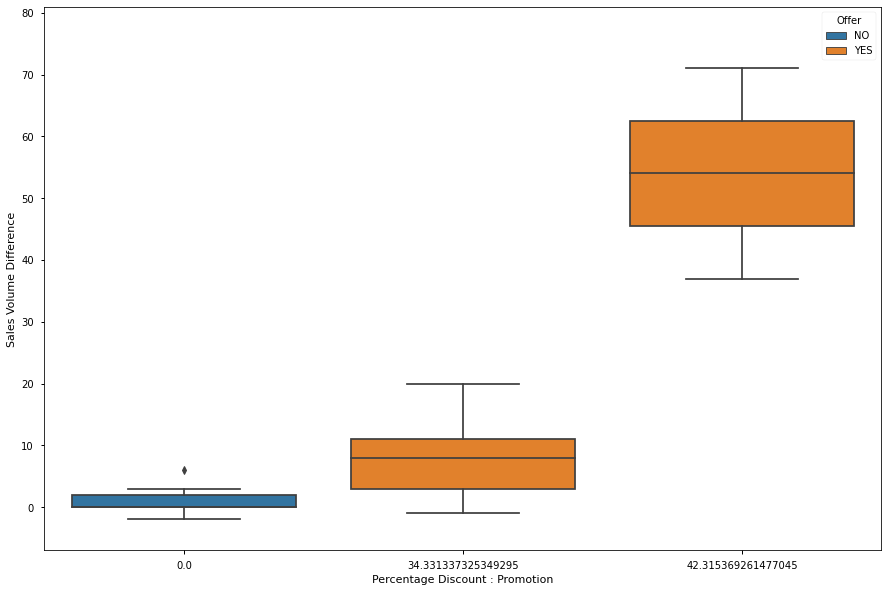

In [25]:
#mc1 = MultiComparison(augustDataNoOfferProd['Sales_Volume_Difference'], augustDataNoOfferProd['Percentage_Discount'])
#mc_results1 = mc1.tukeyhsd(alpha = 0.05)
#print(mc_results1)
#print()

mc2 = MultiComparison(augustDataOfferProd['Sales_Volume_Difference'], augustDataOfferProd['Percentage_Discount'])
mc_results2 = mc2.tukeyhsd(alpha = 0.05)
print(mc_results2)
print()

plt.figure(figsize = (15, 10))
boxPlotDiscPercSalesVolOffer = sb.boxplot(x = "Percentage_Discount", y = "Sales_Volume_Difference", data = augustDataOfferProd, hue = "Offer", dodge = False)
boxPlotDiscPercSalesVolOffer.set(xlabel = "Percentage Discount : Promotion", ylabel = "Sales Volume Difference")
boxPlotDiscPercSalesVolOffer.set_ylim(min(augustDataOfferProd["Sales_Volume_Difference"]) - 5, max(augustDataOfferProd["Sales_Volume_Difference"]) + 10)
#boxPlotDiscPercSalesVolOffer.set_xlabel("Percentage Discount: Promotion", fontsize = 15)

In [26]:
# Let's check if there is an effect seen for the whole year as well.

# Seperate datasets based on offer

yearDataOffer = yearDataFile[["Day", "Month", "Year", "UniSA_Receipt_No1", "UniSA_Customer_No", "Item_Description", "Commodity_Name", "Quantity_Sold", "Item_Value", "Offer"]][yearDataFile["Offer"] == "YES"]
yearDataOfferProducts = yearDataOffer["Item_Description"].unique().tolist()
yearDataNoOffer = yearDataFile[["Day", "Month", "Year", "UniSA_Receipt_No1", "UniSA_Customer_No", "Item_Description", "Commodity_Name", "Quantity_Sold", "Item_Value", "Offer"]][(yearDataFile["Offer"] == "NO") & (yearDataFile["Item_Description"].isin(yearDataOfferProducts))]

In [30]:
# Check all the different "Commodity Names" available.

yearDataFile["Commodity_Name"].unique().tolist()

['NEWSPAPER',
 'CIGARETTE PACKETS',
 'BANANAS',
 'FRUIT JUICES, PASTEURISED',
 'CHOCOLATE CONFECTIONERY',
 'MILK & MILK DRINKS',
 'AERATED WATERS',
 'MICELLANEOUS',
 'MARGARINE AND OILS',
 'BEEF',
 'CANNED FRUIT',
 'OTHER INSTORE BAKERY',
 'CORDIALS, CORDIAL EXTRACTS',
 'SALAD DRESSINGS, MAYONNAISE',
 'CHEESES - LOCAL AND IMPORTED',
 'MISCELLANEOUS MEAT',
 'VEGETABLES',
 'BALFOURS',
 'TIP TOP/BUTTERCUP',
 'FRUIT',
 'HEALTH FOODS',
 'OILS - COOKING AND SALAD',
 'POULTRY',
 'BREAD            INSTORE BAKED',
 'SLICED MEATS',
 'PORK',
 'BISCUITS',
 'SAUCES - ALL VARIETIES',
 'SPREADS,PROCESSED CHEESE',
 'MILKS - POWDERED AND CANNED',
 'COFFEE - INSTANT AND PURE',
 'TOBACCO AND CIGARS',
 'SMOKERS ACCESSORIES',
 'MILK , MILK DRINKS AND CUSTARD',
 'DISHWASHING PRODUCTS',
 'CHUTNEY, PICKLES, CONDIMENTS',
 'CHIPS AND SNACKS',
 'PAPER TISSUES AND TOWELS',
 'FISH',
 'SAUSAGES & BACON',
 'SMALLGOODS',
 'FROZEN DESSERTS',
 'JUICE',
 'ONIONS',
 'HERBS',
 'SPICES, MUSTARD, HERBS',
 'SHAVING REQUIREME

In [31]:
# Look for any item under any commodity name

yearDataOffer["Item_Description"][yearDataOffer["Commodity_Name"] == "CHOCOLATE CONFECTIONERY"].value_counts()

DOVE CHOC BLOCK MILK     150GM    2750
TASTI NUT BAR CHOC DELUXE 210G    1860
CAD CHOC DAIRYMILK       220GM    1782
TASTI NUT BAR CHOC/APT/CNT 210    1780
TASTI NUT BAR YGT/FRT/NUT210GM    1743
TASTI NUT BAR FRT/NUT210GM        1561
TASTI NUT BAR CHOC ALMOND210GM    1336
TASTI MEGA NUTS DBL CHOC 240G     1202
TASTI NUT BAR CHOC PEANUT210GM    1091
TASTI MEGA NUTS CARAMEL 240G       988
TASTI MEGA NUTS NUTY CRUNCH 24     943
MARS BAR SINGLE           53GM     941
MENZ CHOC H/COMB         400GM     938
TASTI PROTEIN BAR NUTY CHOC 20     724
TASTI PROTEIN BAR RST PNUT 200     706
NES KIT KAT        24783  45GM     677
CAD CHOC O/GLD JAMAICA   220GM     596
TASTI HARVEST APPL/CIN 210G        586
TASTI HARVEST FRTS OF FORST 21     582
CAD CHOC CHERRY RIPE MED  52GM     571
CAD CHOC TOP DECK        220GM     570
CAD CHOC SNACK           220GM     555
CAD CHOC FRUIT & NUT     220GM     538
MENZ FRUCHOC 7007        150GM     528
LINDT EXCELLNCE 70%DRK100G         510
TASTI HARVEST APRICOT 210

In [32]:
# Let's now consider one product from both datasets for 2014, and look at how offers affected purchases.

# For Yearly No Offer Products

yearDataNoOfferProd001 = yearDataNoOffer[yearDataNoOffer["Item_Description"] == "CHANDLER PET LITTER        5KG"]
yearDataNoOfferProd001["Item_Value"] = (yearDataNoOfferProd001["Item_Value"] / yearDataNoOfferProd001["Quantity_Sold"]).round(2)
maxPrice = yearDataNoOfferProd001["Item_Value"].max()
yearDataNoOfferProd001["Percentage_Discount"] = round(((maxPrice - yearDataNoOfferProd001["Item_Value"] ) * 100 / maxPrice), 2)

yearDataNoOfferProd001 = yearDataNoOfferProd001.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})

yearDataNoOfferProd001["Expected_Sales"] = floor(myStats.median(yearDataNoOfferProd001["Quantity_Sold"][yearDataNoOfferProd001["Percentage_Discount"] == 0.0]))
yearDataNoOfferProd001["Sales_Difference"] = yearDataNoOfferProd001["Quantity_Sold"] - yearDataNoOfferProd001["Expected_Sales"]
yearDataNoOfferProd001

,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales,Sales_Difference
0,01,02,2014,5.8700,NO,1.0100,2.0000,1,1.0000
1,01,04,2014,5.8700,NO,1.0100,1.0000,1,0.0000
2,01,05,2014,5.6100,NO,5.4000,1.0000,1,0.0000
3,01,05,2014,5.8700,NO,1.0100,1.0000,1,0.0000
4,01,06,2014,5.8700,NO,1.0100,5.0000,1,4.0000
5,01,07,2014,5.8700,NO,1.0100,4.0000,1,3.0000
6,01,10,2014,5.8700,NO,1.0100,2.0000,1,1.0000
7,01,12,2014,5.8700,NO,1.0100,3.0000,1,2.0000
8,02,01,2014,5.8700,NO,1.0100,4.0000,1,3.0000
9,02,02,2014,5.8700,NO,1.0100,1.0000,1,0.0000


In [33]:
yearDataNoOfferProd001.describe()

,Item_Value,Percentage_Discount,Quantity_Sold,Expected_Sales,Sales_Difference
count,299.0000,299.0000,299.0000,299.0000,299.0000
mean,5.6576,4.5921,2.3177,1.0000,1.3177
std,0.6388,10.7714,1.5915,0.0000,1.5915
min,3.6900,0.0000,1.0000,1.0000,0.0000
25%,5.8700,1.0100,1.0000,1.0000,0.0000
50%,5.8700,1.0100,2.0000,1.0000,1.0000
75%,5.8700,1.0100,3.0000,1.0000,2.0000
max,5.9300,37.7700,10.0000,1.0000,9.0000


In [34]:
# In case of yearDataNoOfferProd dataset -
# There are no promotions with such discounts. It could be a product close to expiration. Or something else "unusual". 
# Obviously, this price should not be included in the "base" price. Easy solution is to select the 75% quantile ~ 5.8700
# But if we check the base item value is 5.9300 based on the percentage discounts.
# And Quantity sold where "Item_Value" is not equal to 5.9300 will be set as abs value of 75% Quantile when "Item_Value" is equal to 5.9300 .

#First Calculate all

yearDataNoOfferProd001 = yearDataNoOffer[yearDataNoOffer["Item_Description"] == "CHANDLER PET LITTER        5KG"]
maxPrice = yearDataNoOfferProd001["Item_Value"].max()
yearDataNoOfferProd001["Percentage_Discount"] = (maxPrice - yearDataNoOfferProd001["Item_Value"] ) * 100 / maxPrice
yearDataNoOfferProd001 = yearDataNoOfferProd001.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
yearDataNoOfferProd001["Expected_Sales_Volume"] = floor(myStats.median(yearDataNoOfferProd001["Quantity_Sold"][yearDataNoOfferProd001["Percentage_Discount"] == 0.0]))
yearDataNoOfferProd001["Sales_Volume_Difference"] = yearDataNoOfferProd001["Quantity_Sold"] - yearDataNoOfferProd001["Expected_Sales_Volume"]

# Then impuate

yearDataNoOfferProd001["Quantity_Sold"][yearDataNoOfferProd001["Item_Value"] != 5.9300] = 3.0000
yearDataNoOfferProd001["Item_Value"] = 5.9300

maxPrice = yearDataNoOfferProd001["Item_Value"].max()
yearDataNoOfferProd001["Percentage_Discount"] = (maxPrice - yearDataNoOfferProd001["Item_Value"] ) * 100 / maxPrice
yearDataNoOfferProd001 = yearDataNoOfferProd001.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
yearDataNoOfferProd001["Expected_Sales_Volume"] = floor(myStats.median(yearDataNoOfferProd001["Quantity_Sold"][yearDataNoOfferProd001["Percentage_Discount"] == 0.0]))
yearDataNoOfferProd001["Sales_Volume_Difference"] = yearDataNoOfferProd001["Quantity_Sold"] - yearDataNoOfferProd001["Expected_Sales_Volume"]

#The recalculate based on impuautions

display(yearDataNoOfferProd001)

,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales_Volume,Sales_Volume_Difference
0,01,02,2014,5.9300,NO,0.0000,3.0000,3,0.0000
1,01,04,2014,5.9300,NO,0.0000,3.0000,3,0.0000
2,01,05,2014,5.9300,NO,0.0000,6.0000,3,3.0000
3,01,06,2014,5.9300,NO,0.0000,3.0000,3,0.0000
4,01,07,2014,5.9300,NO,0.0000,6.0000,3,3.0000
5,01,10,2014,5.9300,NO,0.0000,3.0000,3,0.0000
6,01,12,2014,5.9300,NO,0.0000,6.0000,3,3.0000
7,02,01,2014,5.9300,NO,0.0000,3.0000,3,0.0000
8,02,02,2014,5.9300,NO,0.0000,3.0000,3,0.0000
9,02,04,2014,5.9300,NO,0.0000,3.0000,3,0.0000


In [35]:
(yearDataNoOfferProd001['Sales_Volume_Difference'] > 1.0000).count()

269

In [36]:
# For Yearly Offer Products

yearDataOfferProd001 = yearDataOffer[yearDataOffer["Item_Description"] == "CHANDLER PET LITTER        5KG"]
yearDataOfferProd001["Item_Value"] = (yearDataOfferProd001["Item_Value"] / yearDataOfferProd001["Quantity_Sold"]).round(2)
yearDataOfferProd001["Percentage_Discount"] = round(((maxPrice - yearDataOfferProd001["Item_Value"]) * 100 / maxPrice), 2)

yearDataOfferProd001 = yearDataOfferProd001.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})

yearDataOfferProd001["Expected_Sales_Volume"] = floor(myStats.median(yearDataNoOfferProd001["Quantity_Sold"][yearDataNoOfferProd001["Percentage_Discount"] == 0.0]))
yearDataOfferProd001["Sales_Volume_Difference"] = yearDataOfferProd001["Quantity_Sold"]- yearDataOfferProd001["Expected_Sales_Volume"]
#yearDataOfferProd001 = pd.concat([yearDataNoOfferProd001[yearDataNoOfferProd001["Percentage_Discount"] == 0.0], yearDataOfferProd001], axis = 0, ignore_index = True)

#display(yearDataOfferProd001)

#yearDataOfferProd001 = pd.concat([yearDataNoOfferProd001[yearDataNoOfferProd001["Percentage_Discount"] == 0.0], yearDataOfferProd001], axis = 0, ignore_index = True)
df1 = pd.DataFrame(data=yearDataNoOfferProd001)
df2 = pd.DataFrame(data=yearDataOfferProd001)
x = df1.append(df2, ignore_index=True)
display(x)

,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales_Volume,Sales_Volume_Difference
0,01,02,2014,5.9300,NO,0.0000,3.0000,3,0.0000
1,01,04,2014,5.9300,NO,0.0000,3.0000,3,0.0000
2,01,05,2014,5.9300,NO,0.0000,6.0000,3,3.0000
3,01,06,2014,5.9300,NO,0.0000,3.0000,3,0.0000
4,01,07,2014,5.9300,NO,0.0000,6.0000,3,3.0000
5,01,10,2014,5.9300,NO,0.0000,3.0000,3,0.0000
6,01,12,2014,5.9300,NO,0.0000,6.0000,3,3.0000
7,02,01,2014,5.9300,NO,0.0000,3.0000,3,0.0000
8,02,02,2014,5.9300,NO,0.0000,3.0000,3,0.0000
9,02,04,2014,5.9300,NO,0.0000,3.0000,3,0.0000


In [37]:
mc = MultiComparison(x['Sales_Volume_Difference'], x['Percentage_Discount'])
mc_results = mc.tukeyhsd(alpha = 0.05)
print(mc_results)
print()


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    5.4  -2.4387  0.243 -5.8065 0.9292  False
   0.0   6.41  -0.4084 0.3248 -1.0284 0.2117  False
   0.0  10.79  -0.9002 0.0727 -1.8548 0.0544  False
   5.4   6.41   2.0303 0.4181 -1.3819 5.4425  False
   5.4  10.79   1.5385 0.6463 -1.9501  5.027  False
  6.41  10.79  -0.4918 0.6379 -1.5926 0.6089  False
---------------------------------------------------



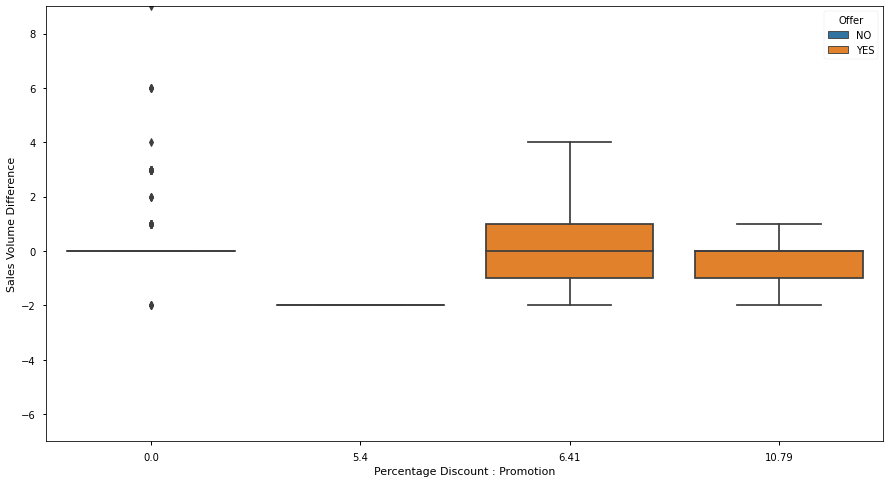

In [38]:

plt.figure(figsize = (15, 8))
boxPlotDiscPercSalesVolOffer = sb.boxplot(x = "Percentage_Discount", y = "Sales_Volume_Difference", data = x, hue = "Offer", dodge = False)
boxPlotDiscPercSalesVolOffer.set(xlabel = "Percentage Discount : Promotion", ylabel = "Sales Volume Difference")
boxPlotDiscPercSalesVolOffer.set_ylim(min(x["Sales_Volume_Difference"]) - 5, max(x["Sales_Volume_Difference"]))
print()

In [39]:
# Let's now consider one product from both datasets for 2014, and look at how offers affected purchases.

yearDataNoOfferProd002 = yearDataNoOffer[yearDataNoOffer["Item_Description"] == "SNICKERS                  50GM"]
yearDataNoOfferProd002["Item_Value"] = (yearDataNoOfferProd002["Item_Value"] / yearDataNoOfferProd002["Quantity_Sold"]).round(2)
maxPrice = yearDataNoOfferProd002["Item_Value"].max()
yearDataNoOfferProd002["Percentage_Discount"] = round(((maxPrice - yearDataNoOfferProd002["Item_Value"] ) * 100 / maxPrice), 2)
yearDataNoOfferProd002 = yearDataNoOfferProd002.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
yearDataNoOfferProd002["Expected_Sales_Volume"] = floor(myStats.median(yearDataNoOfferProd002["Quantity_Sold"][yearDataNoOfferProd002["Percentage_Discount"] == 0.0]))
yearDataNoOfferProd002["Sales_Volume_Difference"] = yearDataNoOfferProd002["Quantity_Sold"] - yearDataNoOfferProd002["Expected_Sales_Volume"]
display(yearDataNoOfferProd002)
 

,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales_Volume,Sales_Volume_Difference
0,01,07,2014,1.8800,NO,0.0000,8.0000,2,6.0000
1,01,08,2014,0.9900,NO,47.3400,47.0000,2,45.0000
2,01,09,2014,0.9800,NO,47.8700,33.0000,2,31.0000
3,01,11,2014,0.9900,NO,47.3400,10.0000,2,8.0000
4,01,12,2014,0.9200,NO,51.0600,30.0000,2,28.0000
5,02,08,2014,0.9900,NO,47.3400,14.0000,2,12.0000
6,02,09,2014,0.9800,NO,47.8700,25.0000,2,23.0000
7,02,10,2014,1.8800,NO,0.0000,1.0000,2,-1.0000
8,02,11,2014,0.9900,NO,47.3400,13.0000,2,11.0000
9,02,12,2014,0.9200,NO,51.0600,30.0000,2,28.0000


In [40]:
#yearDataNoOfferProd002.describe()

In [41]:
# In case of yearDataNoOfferProd dataset -
# There are no promotions with such discounts. It could be a product close to expiration. Or something else "unusual". 
# Obviously, this price should not be included in the "base" price. Easy solution is to select the 75% quantile ~ 0.9900
# But if we check the base item value is 1.8800 based on the percentage discounts.
# And Quantity sold where "Item_Value" is not equal to 1.8800 will be set as abs value of 75% Quantile when "Item_Value" is equal to 1.8800.

#First Calculate all

yearDataNoOfferProd002 = yearDataNoOffer[yearDataNoOffer["Item_Description"] == "SNICKERS                  50GM"]
maxPrice = yearDataNoOfferProd002["Item_Value"].max()
yearDataNoOfferProd002["Percentage_Discount"] = (maxPrice - yearDataNoOfferProd002["Item_Value"] ) * 100 / maxPrice
yearDataNoOfferProd002 = yearDataNoOfferProd002.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
yearDataNoOfferProd002["Expected_Sales_Volume"] = floor(myStats.median(yearDataNoOfferProd002["Quantity_Sold"][yearDataNoOfferProd002["Percentage_Discount"] == 0.0]))
yearDataNoOfferProd002["Sales_Volume_Difference"] = yearDataNoOfferProd002["Quantity_Sold"] - yearDataNoOfferProd002["Expected_Sales_Volume"]

# Then impuate

yearDataNoOfferProd002["Quantity_Sold"][yearDataNoOfferProd002["Item_Value"] != 1.8800] = 2.0000
yearDataNoOfferProd002["Item_Value"] = 1.8800

maxPrice = yearDataNoOfferProd002["Item_Value"].max()
yearDataNoOfferProd002["Percentage_Discount"] = (maxPrice - yearDataNoOfferProd002["Item_Value"] ) * 100 / maxPrice
yearDataNoOfferProd002 = yearDataNoOfferProd002.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
yearDataNoOfferProd002["Expected_Sales_Volume"] = floor(myStats.median(yearDataNoOfferProd002["Quantity_Sold"][yearDataNoOfferProd002["Percentage_Discount"] == 0.0]))
yearDataNoOfferProd002["Sales_Volume_Difference"] = yearDataNoOfferProd002["Quantity_Sold"] - yearDataNoOfferProd002["Expected_Sales_Volume"]

#The recalculate based on impuautions

display(yearDataNoOfferProd002)

,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales_Volume,Sales_Volume_Difference
0,01,07,2014,1.8800,NO,0.0000,8.0000,2,6.0000
1,01,08,2014,1.8800,NO,0.0000,10.0000,2,8.0000
2,01,09,2014,1.8800,NO,0.0000,8.0000,2,6.0000
3,01,11,2014,1.8800,NO,0.0000,2.0000,2,0.0000
4,01,12,2014,1.8800,NO,0.0000,4.0000,2,2.0000
5,02,08,2014,1.8800,NO,0.0000,2.0000,2,0.0000
6,02,09,2014,1.8800,NO,0.0000,4.0000,2,2.0000
7,02,10,2014,1.8800,NO,0.0000,1.0000,2,-1.0000
8,02,11,2014,1.8800,NO,0.0000,4.0000,2,2.0000
9,02,12,2014,1.8800,NO,0.0000,2.0000,2,0.0000


In [42]:
yearDataNoOfferProd002[yearDataNoOfferProd002["Sales_Volume_Difference"] <0.0000].count()

Day                        6
Month                      6
Year                       6
Item_Value                 6
Offer                      6
Percentage_Discount        6
Quantity_Sold              6
Expected_Sales_Volume      6
Sales_Volume_Difference    6
dtype: int64

In [43]:
yearDataOfferProd002 = yearDataOffer[yearDataOffer["Item_Description"] == "SNICKERS                  50GM"]
yearDataOfferProd002["Item_Value"] = (yearDataOfferProd002["Item_Value"] / yearDataOfferProd002["Quantity_Sold"]).round(2)
yearDataOfferProd002["Percentage_Discount"] = round(((maxPrice - yearDataOfferProd002["Item_Value"]) * 100 / maxPrice), 2)
yearDataOfferProd002 = yearDataOfferProd002.groupby(["Day", "Month", "Year", "Item_Value", "Offer", "Percentage_Discount"], as_index = False).agg({"Quantity_Sold": "sum"})
yearDataOfferProd002["Expected_Sales_Volume"] = floor(myStats.median(yearDataNoOfferProd002["Quantity_Sold"][yearDataNoOfferProd002["Percentage_Discount"] == 0.0]))
yearDataOfferProd002["Sales_Volume_Difference"] = yearDataOfferProd002["Quantity_Sold"]- yearDataOfferProd002["Expected_Sales_Volume"]

yearDataOfferProd002["Percentage_Discount"][yearDataOfferProd002["Percentage_Discount"] == -4.7900] = 4.7900

display(yearDataOfferProd002)


,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales_Volume,Sales_Volume_Difference
0,01,10,2014,1.6900,YES,10.1100,3.0000,2,1.0000
1,02,07,2014,1.6900,YES,10.1100,9.0000,2,7.0000
2,02,10,2014,1.6900,YES,10.1100,9.0000,2,7.0000
3,03,07,2014,1.6900,YES,10.1100,12.0000,2,10.0000
4,03,10,2014,1.6900,YES,10.1100,6.0000,2,4.0000
5,04,06,2014,1.6900,YES,10.1100,3.0000,2,1.0000
6,04,07,2014,1.6900,YES,10.1100,12.0000,2,10.0000
7,05,06,2014,1.6900,YES,10.1100,3.0000,2,1.0000
8,05,07,2014,1.6900,YES,10.1100,2.0000,2,0.0000
9,05,10,2014,1.6900,YES,10.1100,2.0000,2,0.0000


In [44]:
yearDataOfferProd002[yearDataOfferProd002["Sales_Volume_Difference"] <0.0000].count()

Day                        11
Month                      11
Year                       11
Item_Value                 11
Offer                      11
Percentage_Discount        11
Quantity_Sold              11
Expected_Sales_Volume      11
Sales_Volume_Difference    11
dtype: int64

In [45]:
#yearDataOfferProd001 = pd.concat([yearDataNoOfferProd001[yearDataNoOfferProd001["Percentage_Discount"] == 0.0], yearDataOfferProd001], axis = 0, ignore_index = True)
df1 = pd.DataFrame(data=yearDataNoOfferProd002)
df2 = pd.DataFrame(data=yearDataOfferProd002)
x = df1.append(df2, ignore_index=True)
display(x)

,Day,Month,Year,Item_Value,Offer,Percentage_Discount,Quantity_Sold,Expected_Sales_Volume,Sales_Volume_Difference
0,01,07,2014,1.8800,NO,0.0000,8.0000,2,6.0000
1,01,08,2014,1.8800,NO,0.0000,10.0000,2,8.0000
2,01,09,2014,1.8800,NO,0.0000,8.0000,2,6.0000
3,01,11,2014,1.8800,NO,0.0000,2.0000,2,0.0000
4,01,12,2014,1.8800,NO,0.0000,4.0000,2,2.0000
5,02,08,2014,1.8800,NO,0.0000,2.0000,2,0.0000
6,02,09,2014,1.8800,NO,0.0000,4.0000,2,2.0000
7,02,10,2014,1.8800,NO,0.0000,1.0000,2,-1.0000
8,02,11,2014,1.8800,NO,0.0000,4.0000,2,2.0000
9,02,12,2014,1.8800,NO,0.0000,2.0000,2,0.0000


In [46]:
mc = MultiComparison(x['Sales_Volume_Difference'], x['Percentage_Discount'])
mc_results = mc.tukeyhsd(alpha = 0.05)
print(mc_results)
print()

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
   0.0   4.79  -2.6988   0.9 -15.6723 10.2748  False
   0.0   6.91  -0.1274   0.9  -5.1182  4.8635  False
   0.0  10.11   0.5234   0.9  -2.1607  3.2075  False
   0.0  46.81  17.2012 0.001  12.9895 21.4129   True
  4.79   6.91   2.5714   0.9 -11.2563 16.3992  False
  4.79  10.11   3.2222   0.9  -9.9498 16.3942  False
  4.79  46.81     19.9 0.001    6.334  33.466   True
  6.91  10.11   0.6508   0.9  -4.8353  6.1369  False
  6.91  46.81  17.3286 0.001  10.9543 23.7028   True
 10.11  46.81  16.6778 0.001  11.8896  21.466   True
----------------------------------------------------



(-21.0, 68.0)

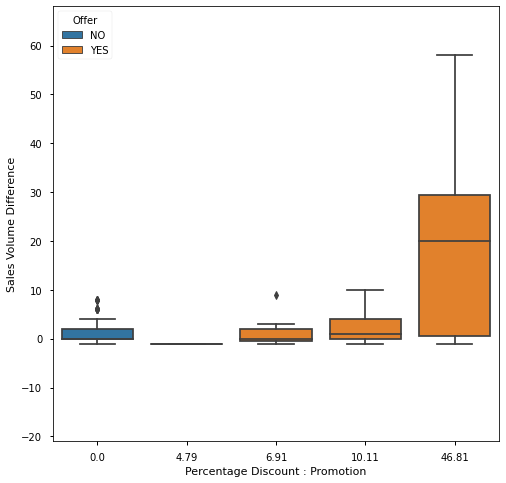

In [47]:
plt.figure(figsize = (8, 8))
boxPlotDiscPercSalesVolNoOffer = sb.boxplot(x = "Percentage_Discount", y = "Sales_Volume_Difference", data = x, hue = "Offer", dodge = False)
boxPlotDiscPercSalesVolNoOffer.set(xlabel = "Percentage Discount : Promotion", ylabel = "Sales Volume Difference")
boxPlotDiscPercSalesVolNoOffer.set_ylim(min(x["Sales_Volume_Difference"]) - 20, max(x["Sales_Volume_Difference"]) + 10)